Datenvorbereitung und Exploration 
o Bereinigen, Umkodieren, Transformieren 
o Visualisieren, beschreiben, Korrelationen untersuchen 
2. Modellierung 
o Zielgrößen frei wählbar, z. B.: 
▪ Höhe der Gesamtausgaben (Regression) 
▪ Reaktion auf Kampagne (Klassifikation) 
o Modellgüte bewerten (z. B. R², RMSE, AUC, Confusion Matrix) 
3. Clusteranalyse 
o Gruppenbildung (z. B. per K-Means) 
o Beschreibung und Interpretation der Segmente 
 
Für alle, die sich etwas mehr Struktur wünschen 
Falls Sie noch unsicher sind, wie Sie starten sollen, hier einige Vorschläge für konkrete 
Fragestellungen. Sie können eine davon aufgreifen – oder sich davon inspirieren lassen: 
Vorschlag 1: Reagieren Kunden mit höherem Einkommen stärker auf Kampagnen? 
• Berechne Durchschnittseinkommen der Kampagnen-Antwortenden 
• Logistische Regression: Vorhersage der Kampagnenantwort anhand Einkommen, 
Alter etc. 
Vorschlag 2: Gibt es verschiedene Kundentypen? 
• Clusteranalyse mit Ausgabenprofilen (z. B. Wein, Fleisch, Süßes) 
• Benenne die Cluster kreativ („Der Gourmet“, „Sparsamer Gelegenheitskäufer“ 
etc.) 
Vorschlag 3: Wie viel geben Kunden pro Kind im Haushalt aus? 
• Feature Engineering: Gesamtausgaben / (Kinder + Teenager + 1) 
• Zusammenhang mit Einkommen oder Kampagnenantwort untersuchen 
Vorschlag 4: Wer ist ein „wertvoller Kunde“? 
• Definiere selbst eine Zielgröße (z. B. jährliche Ausgaben > X) 
• Erstelle ein Entscheidungsmodell, das diesen Kundentyp identifiziert 


In [2]:
import pandas as pd

df = pd.read_csv("Marktkampagne.csv")
df.head()


,ID,Geburtsjahr,Bildungsniveau,Familienstand,Einkommen,Kinder_zu_Hause,Teenager_zu_Hause,Datum_Kunde,Letzter_Kauf_Tage,Ausgaben_Wein,...,Anzahl_WebBesuche_Monat,Kampagne_3_Akzeptiert,Kampagne_4_Akzeptiert,Kampagne_5_Akzeptiert,Kampagne_1_Akzeptiert,Kampagne_2_Akzeptiert,Beschwerde,Z_Kontaktkostenfaktor,Z_Umsatzfaktor,Antwort_Letzte_Kampagne
0,5524,1967,Hochschulabschluss,Ledig,58138.0,0,0,04-09-2022,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1964,Hochschulabschluss,Ledig,46344.0,1,1,08-03-2024,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1975,Hochschulabschluss,Zusammenlebend,71613.0,0,0,21-08-2023,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1994,Hochschulabschluss,Zusammenlebend,26646.0,1,0,10-02-2024,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1991,Doktor,Verheiratet,58293.0,1,0,19-01-2024,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
print(df.columns)


Index(['ID   ', ' Geburtsjahr', ' Bildungsniveau       ',
       ' Familienstand      ', ' Einkommen', ' Kinder_zu_Hause',
       ' Teenager_zu_Hause', ' Datum_Kunde', ' Letzter_Kauf_Tage',
       ' Ausgaben_Wein', ' Ausgaben_Obst', ' Ausgaben_Fleisch',
       ' Ausgaben_Fisch', ' Ausgaben_Süßigkeiten', ' Ausgaben_Gold',
       ' Anzahl_Rabattkäufe', ' Anzahl_Webkäufe', ' Anzahl_Katalogkäufe',
       ' Anzahl_Ladeneinkäufe', ' Anzahl_WebBesuche_Monat',
       ' Kampagne_3_Akzeptiert', ' Kampagne_4_Akzeptiert',
       ' Kampagne_5_Akzeptiert', ' Kampagne_1_Akzeptiert',
       ' Kampagne_2_Akzeptiert', ' Beschwerde', ' Z_Kontaktkostenfaktor',
       ' Z_Umsatzfaktor', ' Antwort_Letzte_Kampagne'],
      dtype='object')


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df.columns = df.columns.str.strip()

# Einkommen-Spalte bereinigen und in float umwandeln
df["Einkommen"] = df["Einkommen"].astype(str).str.strip()
df["Einkommen"] = pd.to_numeric(df["Einkommen"], errors='coerce')

# Fehlende Werte mit Median ersetzen
median_einkommen = df["Einkommen"].median()
df["Einkommen"].fillna(median_einkommen, inplace=True)
# Überprüfen, ob es noch NaN-Werte in der Einkommen-Spalte gibt
if df["Einkommen"].isnull().any():
    print("Es gibt noch NaN-Werte in der Einkommen-Spalte.")
else:
    print("Alle NaN-Werte in der Einkommen-Spalte wurden erfolgreich ersetzt.")
    

# Neue CSV speichern
df.to_csv("Marktkampagne_ohne_NaN_Einkommen.csv", index=False)


Alle NaN-Werte in der Einkommen-Spalte wurden erfolgreich ersetzt.


C:\Users\Rwest\AppData\Local\Temp\ipykernel_19748\3416696666.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Einkommen"].fillna(median_einkommen, inplace=True)


In [6]:
df.describe()

,ID,Geburtsjahr,Einkommen,Kinder_zu_Hause,Teenager_zu_Hause,Letzter_Kauf_Tage,Ausgaben_Wein,Ausgaben_Obst,Ausgaben_Fleisch,Ausgaben_Fisch,...,Anzahl_WebBesuche_Monat,Kampagne_3_Akzeptiert,Kampagne_4_Akzeptiert,Kampagne_5_Akzeptiert,Kampagne_1_Akzeptiert,Kampagne_2_Akzeptiert,Beschwerde,Z_Kontaktkostenfaktor,Z_Umsatzfaktor,Antwort_Letzte_Kampagne
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1978.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1903.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1969.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1980.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1987.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,2006.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA




# Alter berechnen
df["Alter"] = 2025 - df["Geburtsjahr"]

# Datum als datetime konvertieren
df["Datum_Kunde"] = pd.to_datetime(df["Datum_Kunde"], errors="coerce")

# Gesamtausgaben berechnen
ausgaben_spalten = [
    "Ausgaben_Wein", "Ausgaben_Obst", "Ausgaben_Fleisch", "Ausgaben_Fisch",
    "Ausgaben_Süßigkeiten", "Ausgaben_Gold"
]
df["Gesamtausgaben"] = df[ausgaben_spalten].sum(axis=1)

df.to_csv("Marktkampagne_ohne_NaN_Einkommen.csv", index=False)



In [8]:
# Gruppieren der Gesamtausgaben nach Monat
monthly_expenses = (
    df.dropna(subset=['Datum_Kunde'])  # Nur Zeilen mit gültigem Datum
      .set_index('Datum_Kunde')
      .resample('ME')['Gesamtausgaben']
      .sum()
)

monthly_expenses.head()

Datum_Kunde
2022-01-31    14311
2022-02-28     7014
2022-03-31    10918
2022-04-30    10830
2022-05-31    13625
Freq: ME, Name: Gesamtausgaben, dtype: int64

In [9]:
!pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable


In [10]:
# Relevante Kampagnen-Spalten identifizieren
kampagnen_spalten = [col for col in df.columns if "Kampagne_" in col and "Akzeptiert" in col]

# Vergleichsanalyse je Kampagne erstellen
kampagnen_analyse = []

for kampagne in kampagnen_spalten:
    akzeptiert = df[df[kampagne] == 1]
    nicht_akzeptiert = df[df[kampagne] == 0]

    kampagnen_analyse.append({
        "Kampagne": kampagne,
        "Anzahl Akzeptiert": akzeptiert.shape[0],
        "Ø Gesamtausgaben (Akzeptiert)": akzeptiert["Gesamtausgaben"].mean(),
        "Ø Gesamtausgaben (Nicht Akzeptiert)": nicht_akzeptiert["Gesamtausgaben"].mean()
    })

# Ergebnis als DataFrame anzeigen
vergleich_df = pd.DataFrame(kampagnen_analyse)
vergleich_df.sort_values(by="Anzahl Akzeptiert", ascending=False, inplace=True)

# Ergebnis anzeigen
print(vergleich_df)


                Kampagne  Anzahl Akzeptiert  Ø Gesamtausgaben (Akzeptiert)  \
1  Kampagne_4_Akzeptiert                167                    1143.125749   
0  Kampagne_3_Akzeptiert                163                     720.539877   
2  Kampagne_5_Akzeptiert                163                    1616.110429   
3  Kampagne_1_Akzeptiert                144                    1482.222222   
4  Kampagne_2_Akzeptiert                 30                    1307.666667   

   Ø Gesamtausgaben (Nicht Akzeptiert)  
1                           562.511336  
0                           596.793452  
2                           526.510351  
3                           545.585878  
4                           596.270588  


C:\Users\Rwest\AppData\Local\Temp\ipykernel_19748\1837231069.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vergleich_df, x="Kampagne", y="Anzahl Akzeptiert", palette="Blues_d")


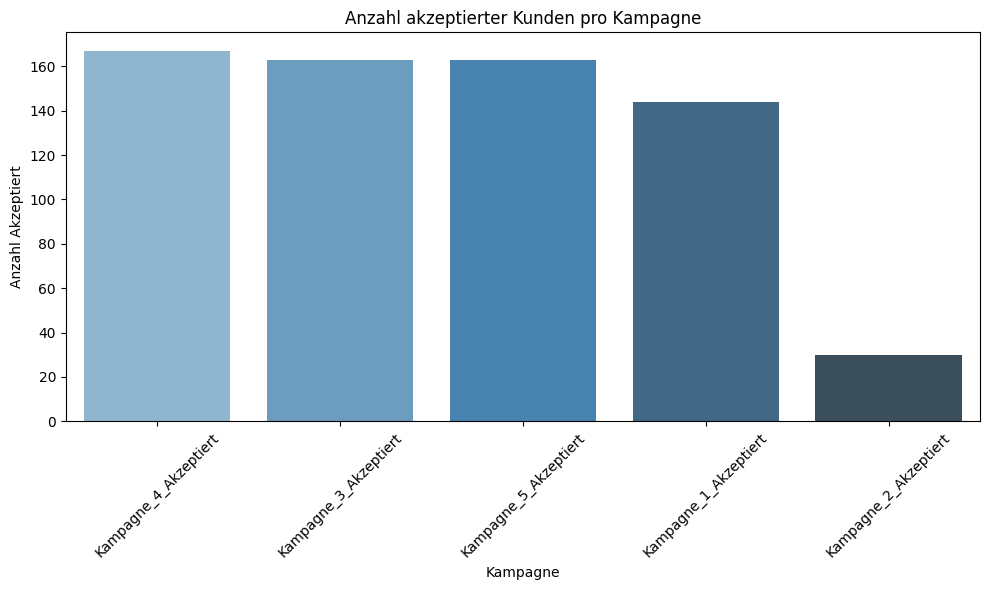

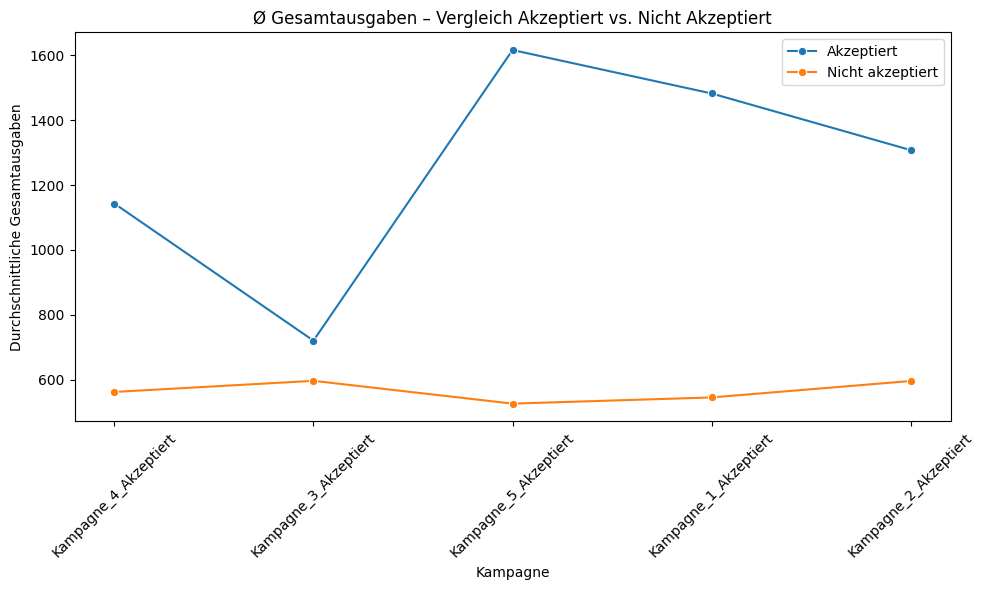

In [11]:

# DataFrame erstellen
vergleich_df = pd.DataFrame(kampagnen_analyse)
vergleich_df.sort_values(by="Anzahl Akzeptiert", ascending=False, inplace=True)

# Balkendiagramm: Anzahl Akzeptierter pro Kampagne
plt.figure(figsize=(10, 6))
sns.barplot(data=vergleich_df, x="Kampagne", y="Anzahl Akzeptiert", palette="Blues_d")
plt.title("Anzahl akzeptierter Kunden pro Kampagne")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Linien-/Vergleichsdiagramm: Durchschnittliche Ausgaben
plt.figure(figsize=(10, 6))
sns.lineplot(data=vergleich_df, x="Kampagne", y="Ø Gesamtausgaben (Akzeptiert)", label="Akzeptiert", marker="o")
sns.lineplot(data=vergleich_df, x="Kampagne", y="Ø Gesamtausgaben (Nicht Akzeptiert)", label="Nicht akzeptiert", marker="o")
plt.title("Ø Gesamtausgaben – Vergleich Akzeptiert vs. Nicht Akzeptiert")
plt.ylabel("Durchschnittliche Gesamtausgaben")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Balkendiagramm – zeigt, wie viele Kunden jede Kampagne angenommen haben.


Liniendiagramm – zeigt, ob die akzeptierenden Kunden tendenziell höhere oder niedrigere Gesamtausgaben hatten als die ablehnenden.

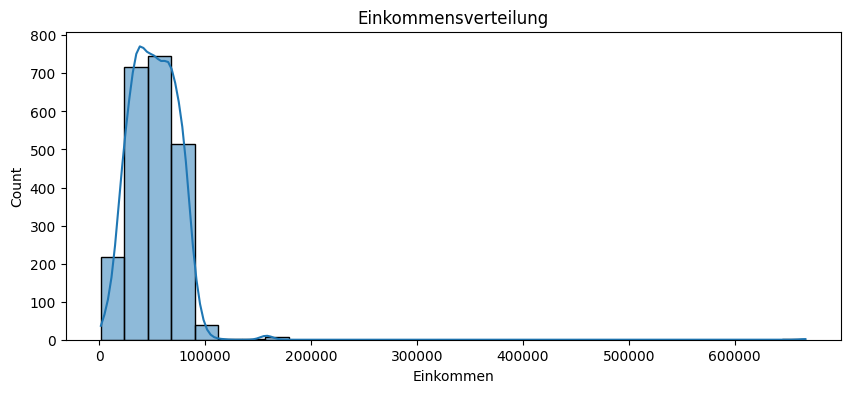

In [12]:

# 📊 3. Exploration & Visualisierung
plt.figure(figsize=(10, 4))
sns.histplot(df["Einkommen"], bins=30, kde=True)
plt.title("Einkommensverteilung")
plt.show()


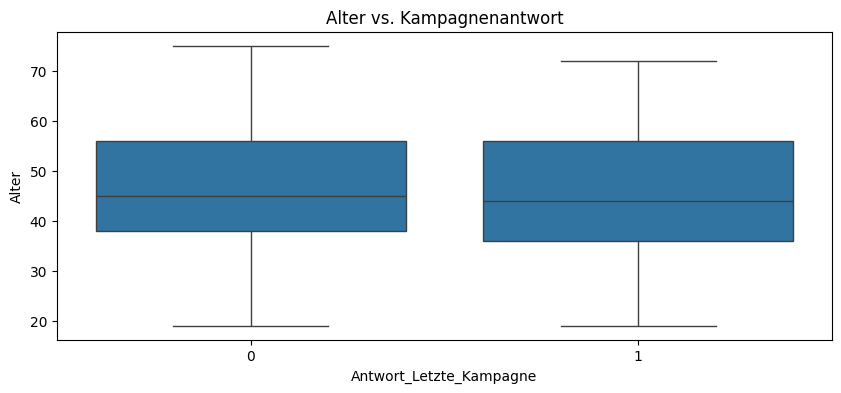

In [13]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x="Antwort_Letzte_Kampagne", y="Alter",showfliers=False)
plt.title("Alter vs. Kampagnenantwort")
plt.show()

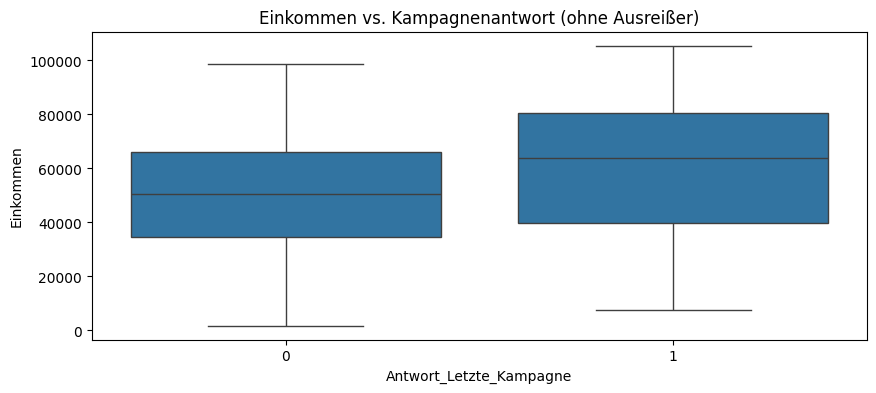

In [14]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x="Antwort_Letzte_Kampagne", y="Einkommen", showfliers=False)
plt.title("Einkommen vs. Kampagnenantwort (ohne Ausreißer)")
plt.show()


C:\Users\Rwest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


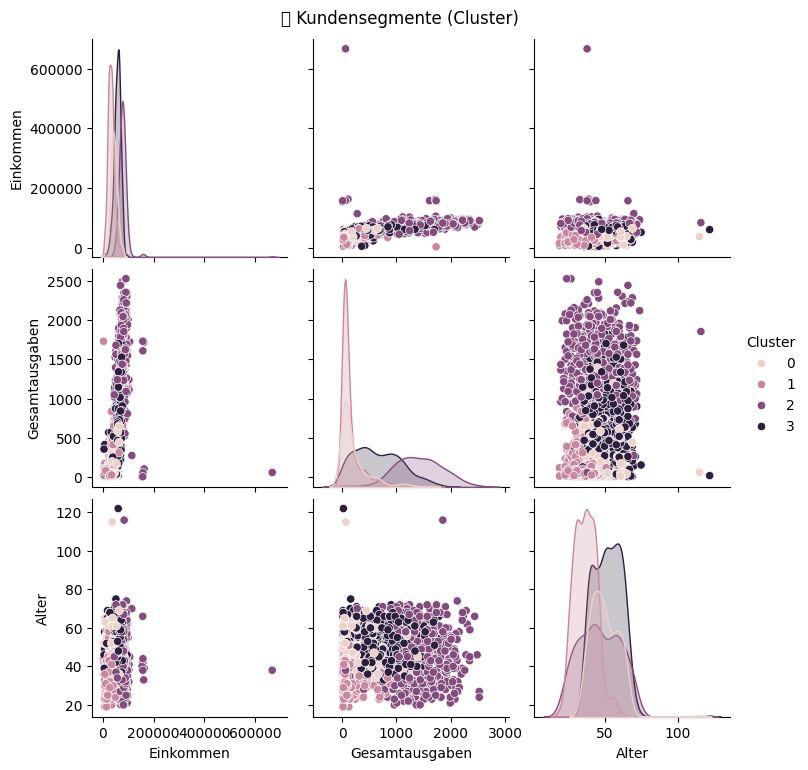

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Wichtige Features für Clustering
features = ["Einkommen", "Alter", "Gesamtausgaben", "Kinder_zu_Hause", "Teenager_zu_Hause"]
X = df[features]

# Skalierung
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Cluster-Visualisierung
sns.pairplot(df, hue="Cluster", vars=["Einkommen", "Gesamtausgaben", "Alter"])
plt.suptitle("👥 Kundensegmente (Cluster)", y=1.02)
plt.show()
# PCA für 2D-Visualisierung
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(10, 6))

📣 Wer reagiert auf Kampagnen?

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       379
           1       0.46      0.17      0.25        69

    accuracy                           0.84       448
   macro avg       0.66      0.57      0.58       448
weighted avg       0.80      0.84      0.81       448



C:\Users\Rwest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


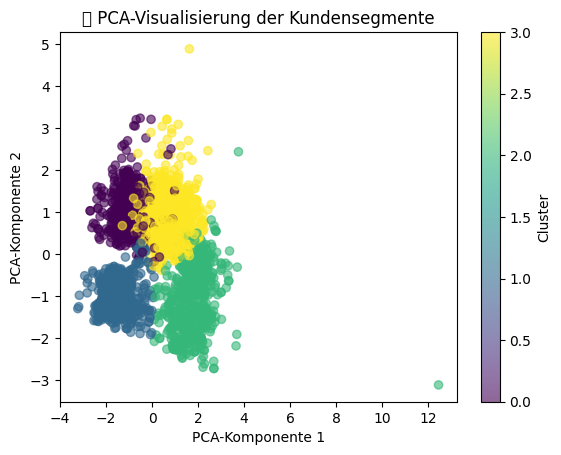

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_clf = df[["Einkommen", "Alter", "Kinder_zu_Hause", "Teenager_zu_Hause", "Gesamtausgaben"]]
y_clf = df["Antwort_Letzte_Kampagne"]

X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

model_clf = RandomForestClassifier(random_state=42)
model_clf.fit(X_train, y_train)

y_pred = model_clf.predict(X_test)
print("📣 Wer reagiert auf Kampagnen?\n")
print(classification_report(y_test, y_pred))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["Cluster"], cmap="viridis", alpha=0.6)
plt.title("🔍 PCA-Visualisierung der Kundensegmente")
plt.xlabel("PCA-Komponente 1")
plt.ylabel("PCA-Komponente 2")
plt.colorbar(label="Cluster")
plt.show()


💰 Was unterscheidet gute Kunden?
MAE: 203.15
R²: 0.74


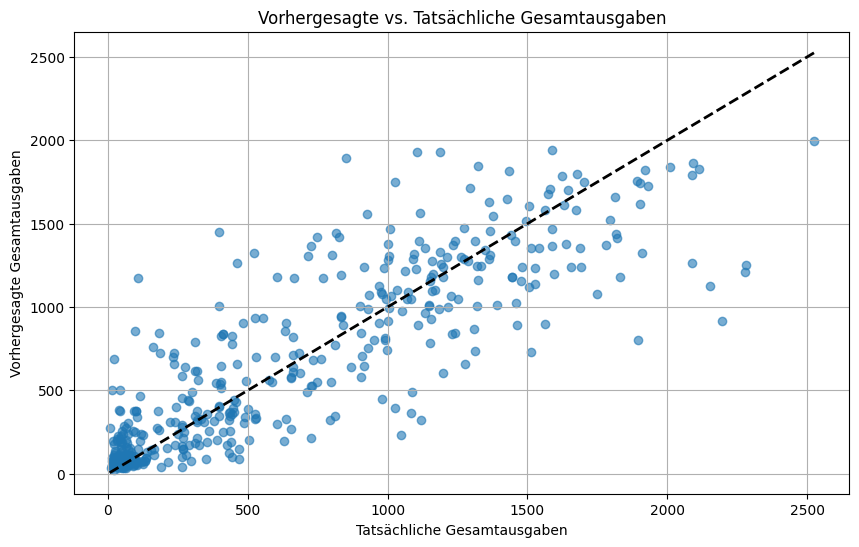

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

X_reg = df[["Einkommen", "Alter", "Kinder_zu_Hause", "Teenager_zu_Hause", "Antwort_Letzte_Kampagne"]]
y_reg = df["Gesamtausgaben"]

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

model_reg = RandomForestRegressor(random_state=42)
model_reg.fit(X_train_r, y_train_r)

y_pred_r = model_reg.predict(X_test_r)

print("💰 Was unterscheidet gute Kunden?")
print(f"MAE: {mean_absolute_error(y_test_r, y_pred_r):.2f}")
print(f"R²: {r2_score(y_test_r, y_pred_r):.2f}")
plt.figure(figsize=(10, 6))
plt.scatter(y_test_r, y_pred_r, alpha=0.6)
plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], 'k--', lw=2)
plt.title("Vorhergesagte vs. Tatsächliche Gesamtausgaben")
plt.xlabel("Tatsächliche Gesamtausgaben")
plt.ylabel("Vorhergesagte Gesamtausgaben")
plt.grid()
plt.show()


Höheres Einkommen & mittleres Alter – tendenziell höhere Reaktionsrate
Höhere Gesamtausgaben korrelieren mit Einkommen, Alter & wenigen Kindern

In [18]:
# Korrelation berechnen, nur für numerische Spalten
correlation_matrix = df.corr(numeric_only=True)

# Absolute Korrelationen über 0.5 (aber unter 1) extrahieren
high_corr = correlation_matrix.abs()
high_corr_filtered = high_corr[(high_corr > 0.5) & (high_corr < 1.0)]

# Die besten Korrelationen anzeigen (nicht-null Werte sortiert)
best_correlations = (
    high_corr_filtered.stack()
    .sort_values(ascending=False)
    .drop_duplicates()
)

best_correlations.head(10)


Gesamtausgaben        Ausgaben_Wein           0.891839
Ausgaben_Fleisch      Gesamtausgaben          0.842965
Cluster               Kinder_zu_Hause         0.811388
Anzahl_Katalogkäufe   Gesamtausgaben          0.778577
                      Ausgaben_Fleisch        0.723827
Gesamtausgaben        Anzahl_Ladeneinkäufe    0.674669
                      Einkommen               0.664775
                      Ausgaben_Fisch          0.642818
Anzahl_Ladeneinkäufe  Ausgaben_Wein           0.642100
Ausgaben_Wein         Anzahl_Katalogkäufe     0.635226
dtype: float64

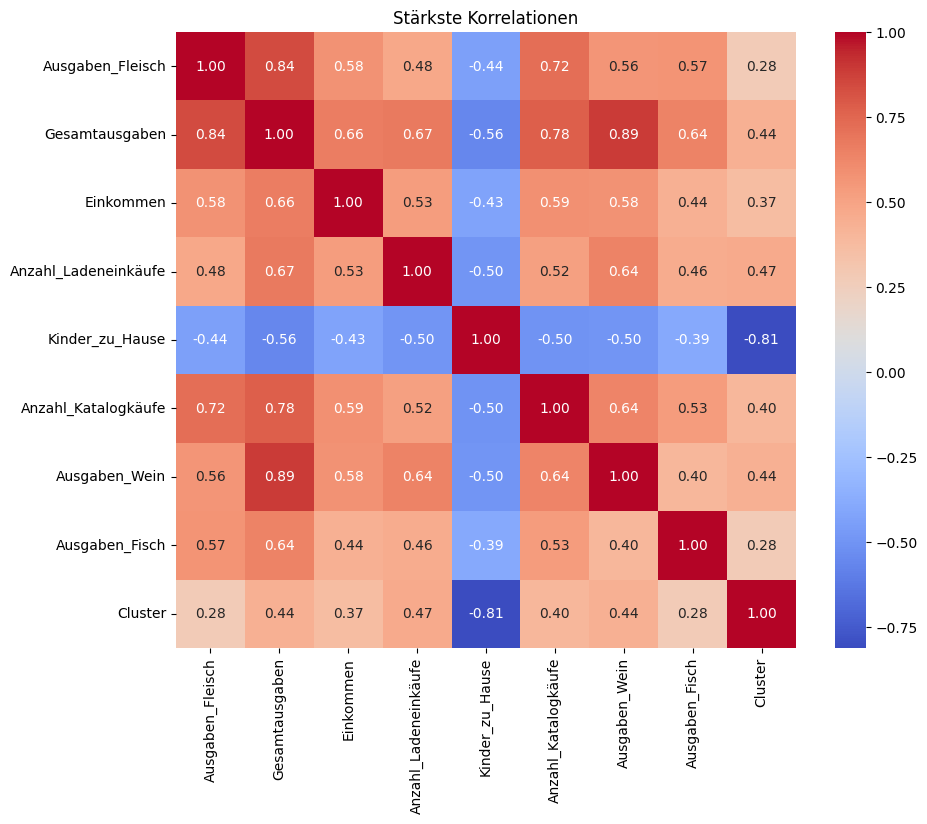

In [19]:
# Nur numerische Spalten auswählen
corr = df.corr(numeric_only=True)

# Nur hohe Korrelationen (zwischen 0.5 und <1)
high_corr = corr.abs()
filtered_corr = high_corr[(high_corr > 0.5) & (high_corr < 1.0)]

# Top-Korrelationen extrahieren
top_corr = (
    filtered_corr.stack()
    .sort_values(ascending=False)
    .drop_duplicates()
    .head(10)
)

# Paare extrahieren
top_pairs = top_corr.index.tolist()
columns_to_plot = list(set([item for sublist in top_pairs for item in sublist]))

# Korrelationsmatrix für Top-Spalten
top_corr_matrix = df[columns_to_plot].corr()

# Heatmap zeichnen
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Stärkste Korrelationen")
plt.show()

C:\Users\Rwest\AppData\Local\Temp\ipykernel_19748\2077830544.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vergleich_df, x="Kategorie", y="Durchschnitt", palette="Blues_d")


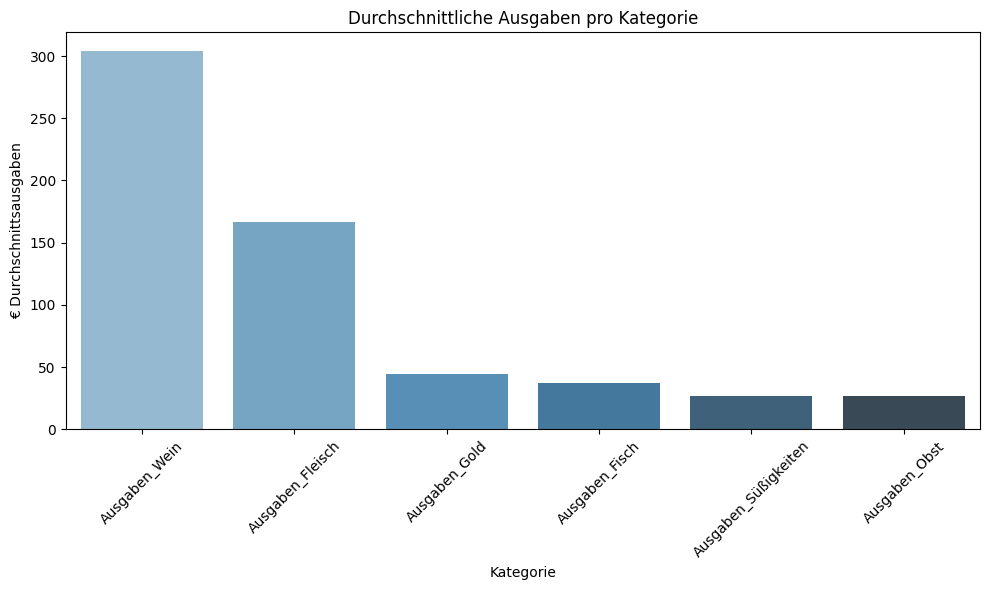

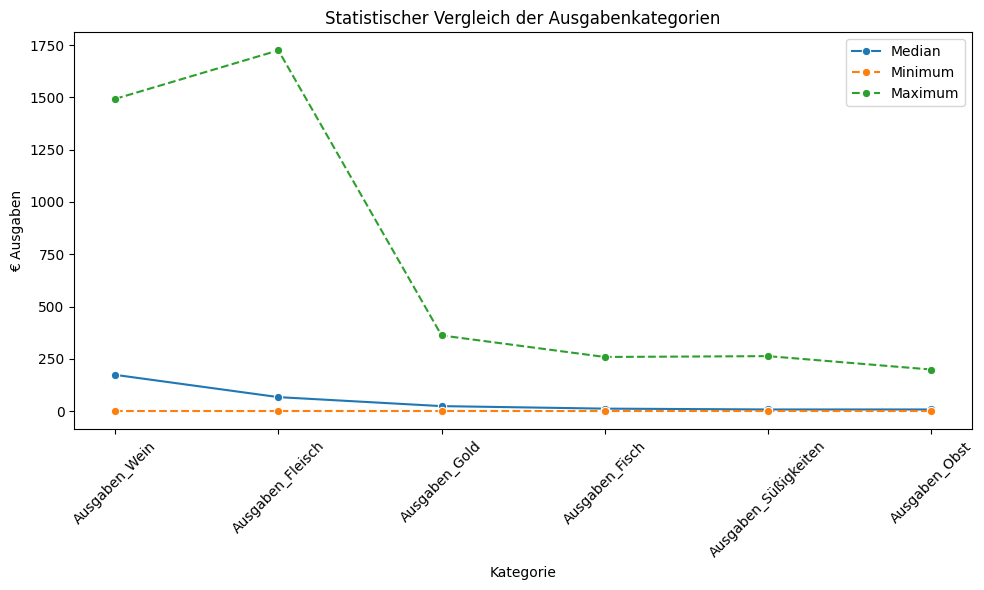

In [20]:

# Ausgabenspalten definieren
ausgaben_spalten = [
    "Ausgaben_Wein", "Ausgaben_Obst", "Ausgaben_Fleisch",
    "Ausgaben_Fisch", "Ausgaben_Süßigkeiten", "Ausgaben_Gold"
]

# Statistische Kennzahlen berechnen
vergleich_df = pd.DataFrame({
    "Kategorie": ausgaben_spalten,
    "Durchschnitt": df[ausgaben_spalten].mean().values,
    "Median": df[ausgaben_spalten].median().values,
    "Minimum": df[ausgaben_spalten].min().values,
    "Maximum": df[ausgaben_spalten].max().values,
    "Standardabweichung": df[ausgaben_spalten].std().values
})

# Nach Durchschnitt sortieren
vergleich_df.sort_values(by="Durchschnitt", ascending=False, inplace=True)

# Balkendiagramm für den Durchschnitt
plt.figure(figsize=(10, 6))
sns.barplot(data=vergleich_df, x="Kategorie", y="Durchschnitt", palette="Blues_d")
plt.title("Durchschnittliche Ausgaben pro Kategorie")
plt.ylabel("€ Durchschnittsausgaben")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Liniendiagramm für Median, Min, Max
plt.figure(figsize=(10, 6))
sns.lineplot(data=vergleich_df, x="Kategorie", y="Median", label="Median", marker="o")
sns.lineplot(data=vergleich_df, x="Kategorie", y="Minimum", label="Minimum", marker="o", linestyle="--")
sns.lineplot(data=vergleich_df, x="Kategorie", y="Maximum", label="Maximum", marker="o", linestyle="--")
plt.title("Statistischer Vergleich der Ausgabenkategorien")
plt.ylabel("€ Ausgaben")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [15]:
# 🧠 4. Modellierung: Kampagnenreaktion (binär)
features = ["Einkommen", "Alter", "Kinder_zu_Hause", "Teenager_zu_Hause", "Gesamtausgaben"]
X = df[features]
y = df["Antwort_Letzte_Kampagne"]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skalierung
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Confusion Matrix:
 [[374   5]
 [ 65   4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91       379
           1       0.44      0.06      0.10        69

    accuracy                           0.84       448
   macro avg       0.65      0.52      0.51       448
weighted avg       0.79      0.84      0.79       448

ROC AUC Score: 0.6972964704982602


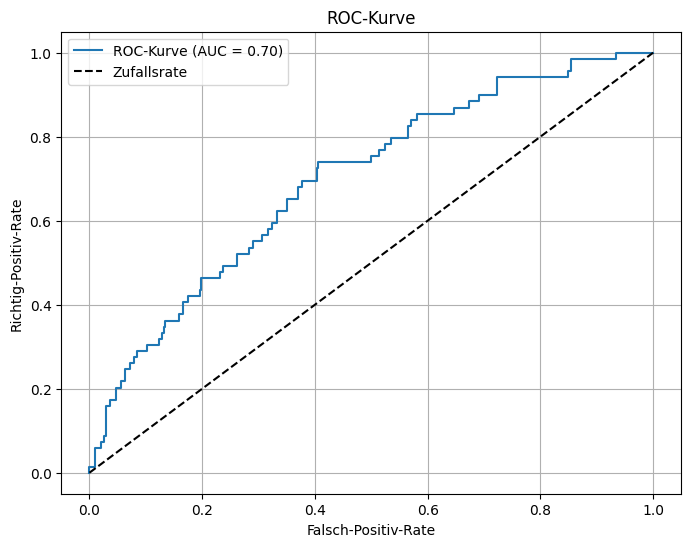

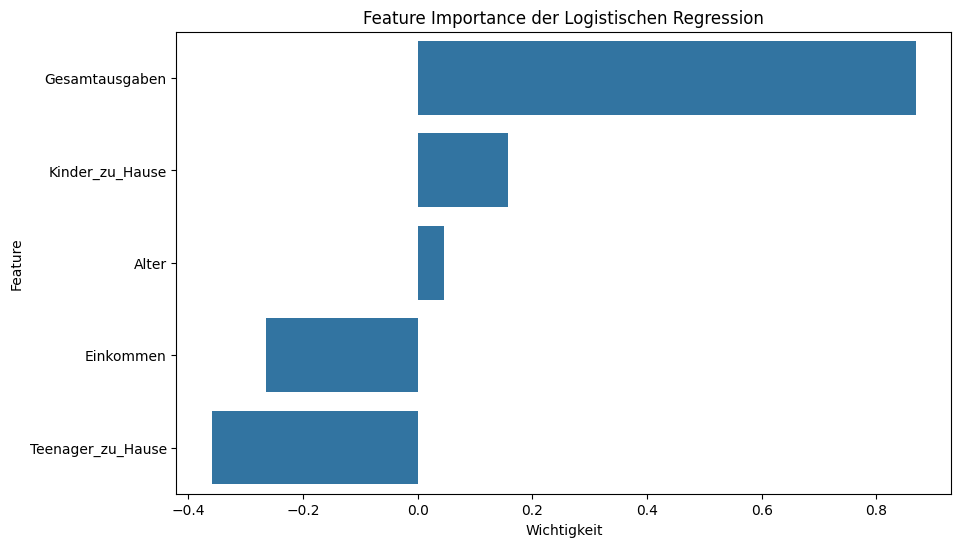

In [49]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Falls X_train_scaled nicht existiert, jetzt erzeugen
if "X_train_scaled" not in locals():
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

# Logistische Regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# 📈 5. Bewertung
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
# ROC-Kurve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC-Kurve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba)))
plt.plot([0, 1], [0, 1], 'k--', label='Zufallsrate')
plt.title('ROC-Kurve')
plt.xlabel('Falsch-Positiv-Rate')
plt.ylabel('Richtig-Positiv-Rate')
plt.legend()
plt.grid()
plt.show()
# Feature Importance
importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.coef_[0]
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=importance, x='Importance', y='Feature')
plt.title('Feature Importance der Logistischen Regression')
plt.xlabel('Wichtigkeit')  
plt.ylabel('Feature')
plt.show()



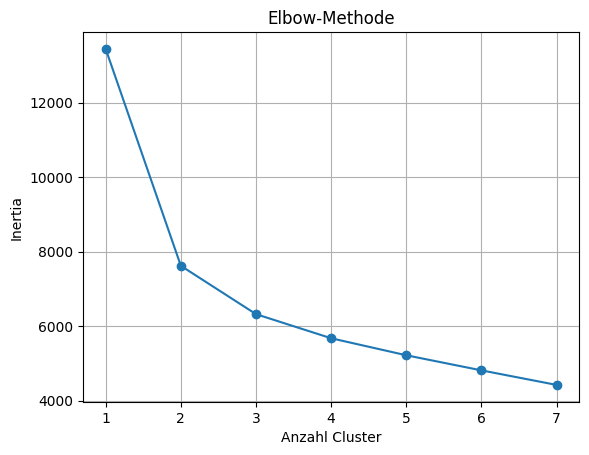

In [51]:
# 🔍 6. Clusteranalyse
X_cluster = df[ausgaben_spalten]
X_cluster_scaled = StandardScaler().fit_transform(X_cluster)

# Elbow-Methode (optional)
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 8), inertia, marker='o')
plt.xlabel("Anzahl Cluster")
plt.ylabel("Inertia")
plt.title("Elbow-Methode")
plt.grid()
plt.show()

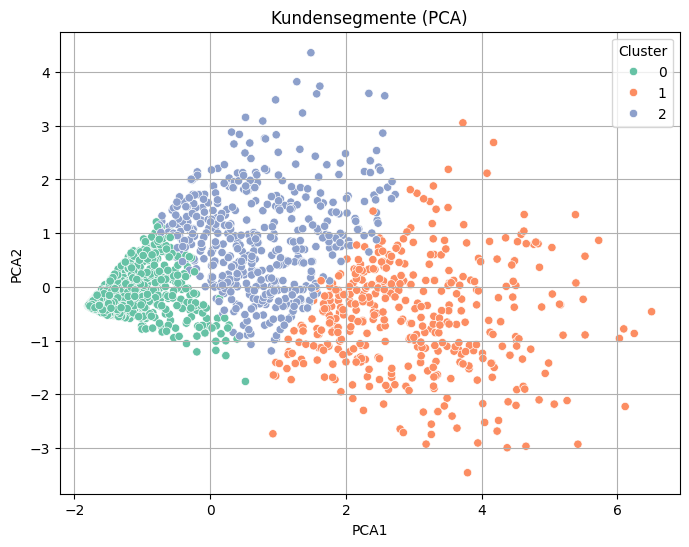

,Ausgaben_Wein,Ausgaben_Obst,Ausgaben_Fleisch,Ausgaben_Fisch,Ausgaben_Süßigkeiten,Ausgaben_Gold,Einkommen,Gesamtausgaben
Cluster,,,,,,,,
0,86.993721,6.251962,33.888540,8.677394,6.232339,17.288854,39142.226845,159.332810
1,543.983945,84.834862,463.564220,118.325688,87.376147,83.582569,74057.371560,1381.667431
2,627.941509,26.347170,242.792453,40.400000,27.518868,75.737736,65767.649057,1040.737736


In [52]:
# K-Means mit 3 Clustern
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_cluster_scaled)

# PCA für 2D-Darstellung
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster_scaled)
df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2")
plt.title("Kundensegmente (PCA)")
plt.grid()
plt.show()

# Clusterbeschreibung
cluster_summary = df.groupby("Cluster")[ausgaben_spalten + ["Einkommen", "Gesamtausgaben"]].mean()
display(cluster_summary)

In [ ]:
df

,Alter_Gruppe,Gesamtausgaben
0,0-18,0
1,19-35,242652
2,36-50,556144
3,51-65,456352
4,65+,99900


C:\Users\Rwest\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


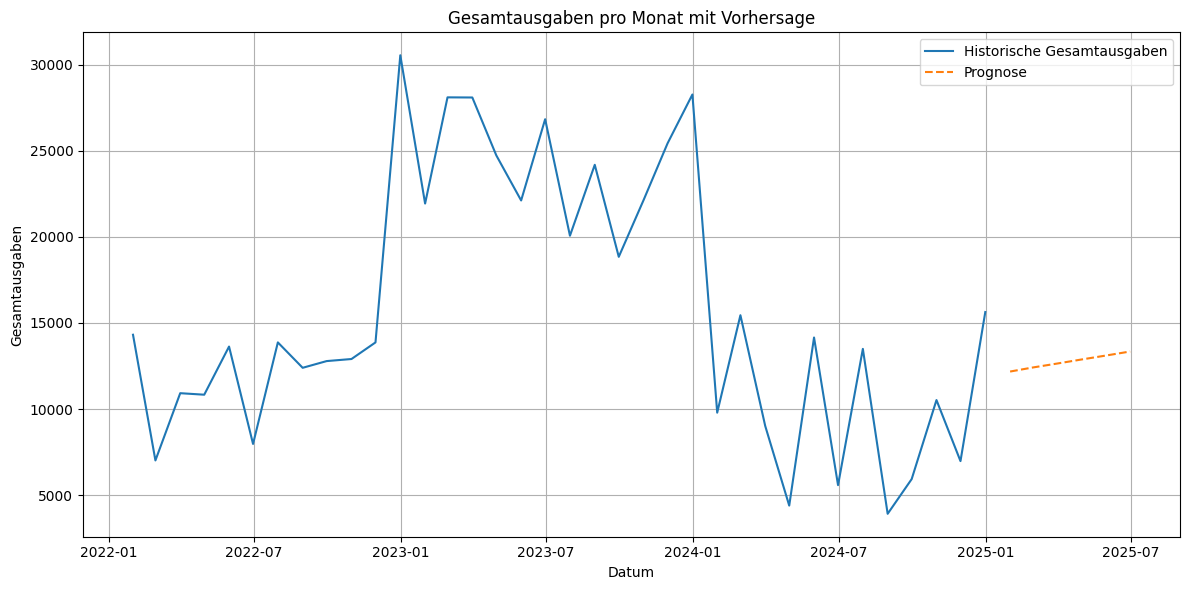

In [27]:
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Modell: Holt-Winters (Additiv, da keine starke Saisonalität erwartet)
model = ExponentialSmoothing(monthly_expenses, trend='add', seasonal=None)
fit = model.fit()

# Prognose für die nächsten 6 Monate
forecast = fit.forecast(6)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_expenses, label='Historische Gesamtausgaben')
plt.plot(forecast, label='Prognose', linestyle='--')
plt.title('Gesamtausgaben pro Monat mit Vorhersage')
plt.xlabel('Datum')
plt.ylabel('Gesamtausgaben')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Ziel: Gesamtausgaben
y_reg = df["Gesamtausgaben"]
X_reg = df[["Einkommen", "Alter", "Kinder_zu_Hause", "Teenager_zu_Hause", "Antwort_Letzte_Kampagne"]]

# Split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Modell
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)

# Vorhersage
y_pred_reg = rf_reg.predict(X_test_reg)

# Bewertung
print("R²:", r2_score(y_test_reg, y_pred_reg))
print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)))



R²: 0.7433530632711204
RMSE: 302.0835735056882


Regression


              precision    recall  f1-score   support

           0       0.86      0.96      0.91       379
           1       0.46      0.17      0.25        69

    accuracy                           0.84       448
   macro avg       0.66      0.57      0.58       448
weighted avg       0.80      0.84      0.81       448

Anzahl prognostizierter positiver Rückmeldungen im Testset: 26


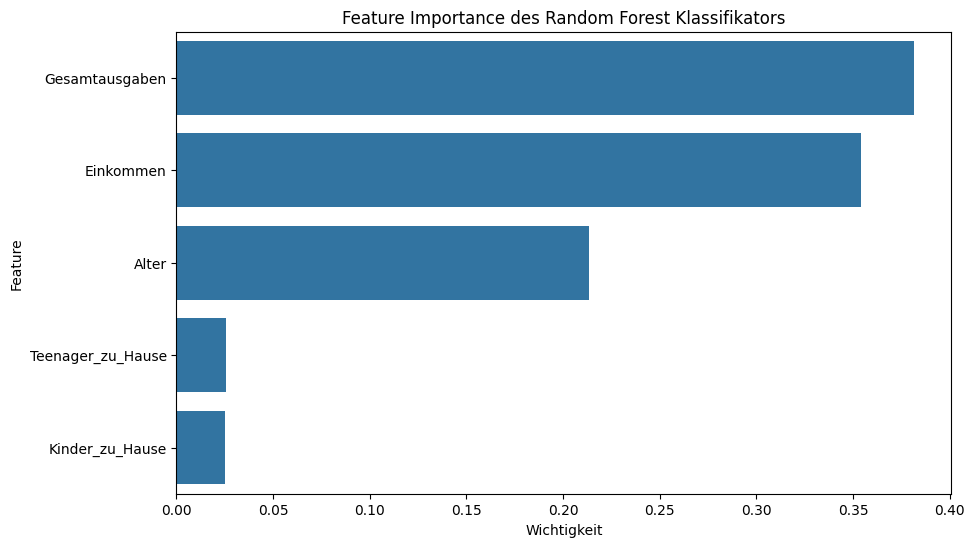

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Ziel: Antwort auf letzte Kampagne (0/1)
y_clf = df["Antwort_Letzte_Kampagne"]
X_clf = df[["Einkommen", "Alter", "Kinder_zu_Hause", "Teenager_zu_Hause", "Gesamtausgaben"]]

# Split
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Klassifikationsmodell
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_clf, y_train_clf)

# Vorhersage
y_pred_clf = rf_clf.predict(X_test_clf)

# Bewertung
print(classification_report(y_test_clf, y_pred_clf))
print("Anzahl prognostizierter positiver Rückmeldungen im Testset:", sum(y_pred_clf))
# Feature Importance
importance_clf = pd.DataFrame({
    'Feature': X_clf.columns,
    'Importance': rf_clf.feature_importances_
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_clf, x='Importance', y='Feature')
plt.title('Feature Importance des Random Forest Klassifikators')
plt.xlabel('Wichtigkeit')
plt.ylabel('Feature')
plt.show()



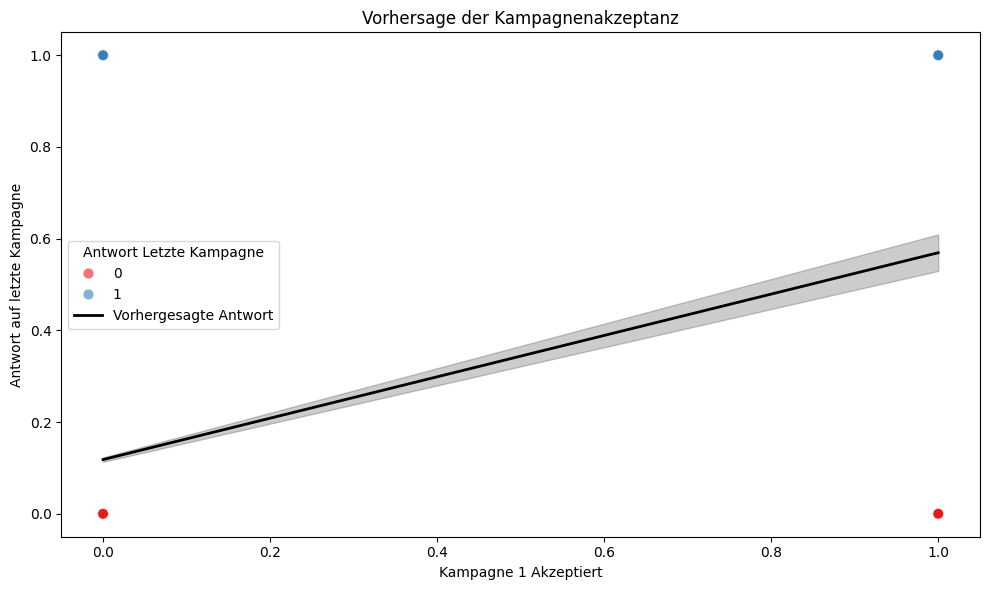

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Daten für die Analyse
kampagne_data = df[['Kampagne_1_Akzeptiert', 'Kampagne_2_Akzeptiert', 'Kampagne_3_Akzeptiert', 'Kampagne_4_Akzeptiert', 'Kampagne_5_Akzeptiert']]
X = kampagne_data
y = df['Antwort_Letzte_Kampagne']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
df['Vorhersage'] = model.predict(X)

plt.figure(figsize=(10, 6))
# Streudiagramm: Echte Werte
sns.scatterplot(
    x=df['Kampagne_1_Akzeptiert'],
    y=y,
    hue=y,
    palette='Set1',
    alpha=0.6,
    s=60
)
# Linie: Vorhersage
sns.lineplot(
    x=df['Kampagne_1_Akzeptiert'],
    y=df['Vorhersage'],
    color='black',
    linewidth=2,
    label='Vorhergesagte Antwort'
)
plt.title('Vorhersage der Kampagnenakzeptanz')
plt.xlabel('Kampagne 1 Akzeptiert')
plt.ylabel('Antwort auf letzte Kampagne')
plt.legend(title='Antwort Letzte Kampagne')
plt.tight_layout()
plt.show()



In [49]:
pip install dash plotly pandas scikit-learn


^C
Note: you may need to restart the kernel to use updated packages.


In [1]:
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split

# ==== 1. Daten laden ====
df = pd.read_csv("Marktkampagne_ohne_NaN_Einkommen.csv")  # Deine Datei nach Vorverarbeitung
df = df.dropna()
# Gesamtausgaben berechnen
ausgaben_spalten = [
    "Ausgaben_Wein", "Ausgaben_Obst", "Ausgaben_Fleisch", "Ausgaben_Fisch",
    "Ausgaben_Süßigkeiten", "Ausgaben_Gold"
]
df["Gesamtausgaben"] = df[ausgaben_spalten].sum(axis=1)
df["Alter"] = 2025 - df["Geburtsjahr"]

# ==== 2. Modelle trainieren ====

# Regressionsmodell
X_reg = df[["Einkommen","Alter", "Kinder_zu_Hause", "Teenager_zu_Hause", "Antwort_Letzte_Kampagne"]]
y_reg = df["Gesamtausgaben"]
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_reg, y_reg)

# Klassifikationsmodell
X_clf = df[["Einkommen", "Alter", "Kinder_zu_Hause", "Teenager_zu_Hause", "Gesamtausgaben"]]
y_clf = df["Antwort_Letzte_Kampagne"]
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_clf, y_clf)

# ==== 3. Dashboard Setup ====
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("📊 Kundenanalyse-Dashboard zur Marktkampagne"),
    
    html.Div([
        html.Label("Alter (max):"),
        dcc.Slider(
            min=18, max=100, step=1, value=60, id="alter_slider",
            marks={i: str(i) for i in range(20, 101, 10)}
        ),

        html.Label("Einkommen (max):"),
        dcc.Slider(
            min=0, max=150000, step=1000, value=75000, id="einkommen_slider",
            marks={i: f"{i//1000}k" for i in range(0, 150001, 25000)}
        ),

        html.Label("Anzahl Kinder (gesamt):"),
        dcc.Slider(
            min=0, max=5, step=1, value=2, id="kinder_slider",
            marks={i: str(i) for i in range(0, 6)}
        ),
    ], style={"width": "40%", "padding": "10px"}),

    dcc.Graph(id="ausgaben_histogramm"),

    html.Div(id="prognose_output", style={"padding": "20px", "fontSize": "18px", "fontWeight": "bold"})
])

# ==== 4. Callback ====
@app.callback(
    [Output("ausgaben_histogramm", "figure"),
     Output("prognose_output", "children")],
    [Input("alter_slider", "value"),
     Input("einkommen_slider", "value"),
     Input("kinder_slider", "value")]
)
def update_dashboard(max_alter, max_einkommen, kinderanzahl):
    # Filterdaten
    gefiltert = df[
        (df["Alter"] <= max_alter) &
        (df["Einkommen"] <= max_einkommen) &
        ((df["Kinder_zu_Hause"] + df["Teenager_zu_Hause"]) == kinderanzahl)
    ]

    # Histogramm
    fig = px.histogram(gefiltert, x="Gesamtausgaben", nbins=30,
                       title="Verteilung der Gesamtausgaben")

    # Prognose für Reaktion
    if not gefiltert.empty:
        X_pred = gefiltert[["Einkommen", "Alter", "Kinder_zu_Hause", "Teenager_zu_Hause", "Gesamtausgaben"]]
        y_pred = rf_clf.predict(X_pred)
        n_reagiert = sum(y_pred)

        # Prognose für Ausgaben
        X_pred_reg = gefiltert[["Einkommen", "Alter", "Kinder_zu_Hause", "Teenager_zu_Hause", "Antwort_Letzte_Kampagne"]]
        y_pred_ausgabe = rf_reg.predict(X_pred_reg)
        ausgabe_summe = round(np.sum(y_pred_ausgabe), 2)

        prognose = f"📦 Erwartete Rückmeldungen: {n_reagiert} Kunden | 💰 Prognostizierte Gesamtausgaben: {ausgabe_summe} €"
    else:
        prognose = "⚠️ Keine passenden Kunden im Filterbereich."

    return fig, prognose

# ==== 5. Starten ====
if __name__ == "__main__":
    app.run(debug=True)

    print("Dash app is running on http://127.0.0.1:8050/")
    print("Press Ctrl+C to stop the server.")  
     



Dash app is running on http://127.0.0.1:8050/
Press Ctrl+C to stop the server.


Regressionsergebnisse:
R²: 0.7723560508597458
RMSE: 284.5031787937527

Klassifikationsergebnisse:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       379
           1       0.54      0.29      0.38        69

    accuracy                           0.85       448
   macro avg       0.71      0.62      0.65       448
weighted avg       0.83      0.85      0.83       448



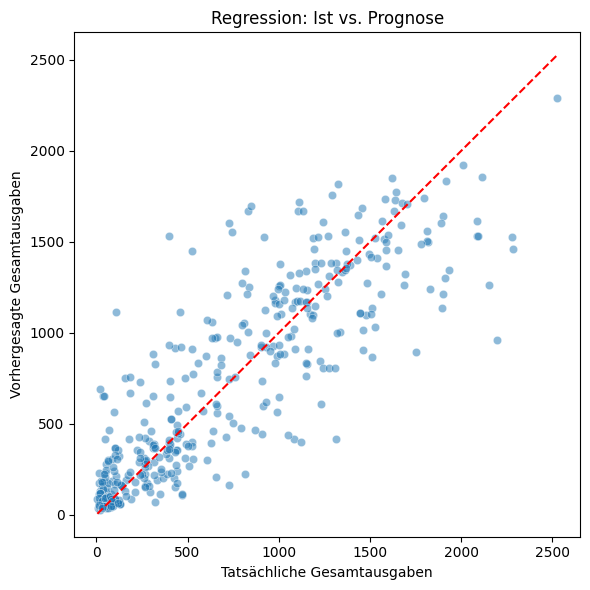

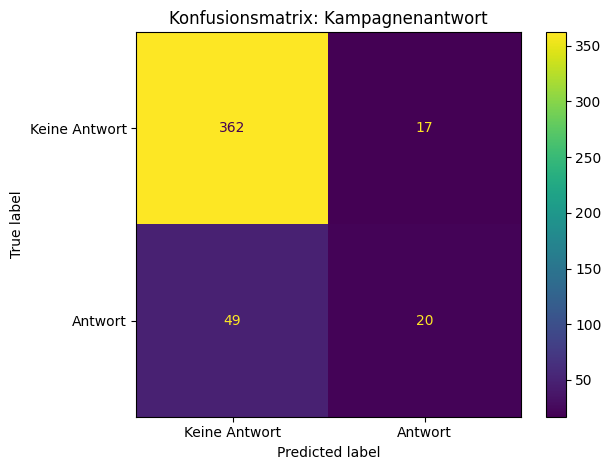

In [36]:
from sklearn.metrics import (
    mean_squared_error, r2_score,
    classification_report, confusion_matrix,
    ConfusionMatrixDisplay  # <- DAS muss ergänzt werden
)

y_reg = df["Gesamtausgaben"]
y_clf = df["Antwort_Letzte_Kampagne"]

# Feature-Auswahl
features = ["Einkommen", "Alter", "Kinder_zu_Hause", "Teenager_zu_Hause", "Letzter_Kauf_Tage", "Anzahl_WebBesuche_Monat"]
X = df[features]

# ==== 2. Regressionsmodell ====
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = rf_reg.predict(X_test_reg)

print("Regressionsergebnisse:")
print("R²:", r2_score(y_test_reg, y_pred_reg))
print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)))

# ==== 3. Klassifikationsmodell ====
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_clf, test_size=0.2, random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_clf, y_train_clf)
y_pred_clf = rf_clf.predict(X_test_clf)

print("\nKlassifikationsergebnisse:")
print(classification_report(y_test_clf, y_pred_clf))

# ==== 4. Visualisierungen ====

# Regression: Ist vs. Prognose
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_reg, y=y_pred_reg, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.xlabel("Tatsächliche Gesamtausgaben")
plt.ylabel("Vorhergesagte Gesamtausgaben")
plt.title("Regression: Ist vs. Prognose")
plt.tight_layout()
plt.show()

# Klassifikation: Konfusionsmatrix
ConfusionMatrixDisplay(confusion_matrix(y_test_clf, y_pred_clf), display_labels=["Keine Antwort", "Antwort"]).plot()
plt.title("Konfusionsmatrix: Kampagnenantwort")
plt.tight_layout()
plt.show()

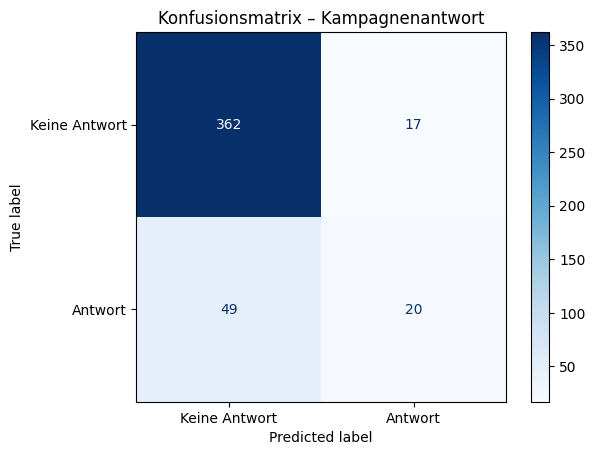

In [37]:
# 6.2: Konfusionsmatrix für Klassifikation
cm = confusion_matrix(y_test_clf, y_pred_clf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Keine Antwort", "Antwort"])
disp.plot(cmap="Blues")
plt.title("Konfusionsmatrix – Kampagnenantwort")
plt.show()

In [33]:
features = ["Einkommen", "Alter", "Kinder_zu_Hause", "Teenager_zu_Hause", "Letzter_Kauf_Tage", "Anzahl_WebBesuche_Monat"]
X = df[features]
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Mean Squared Error: 78715.00
R² Score: 0.79


C:\Users\Rwest\AppData\Local\Temp\ipykernel_29452\2884353914.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




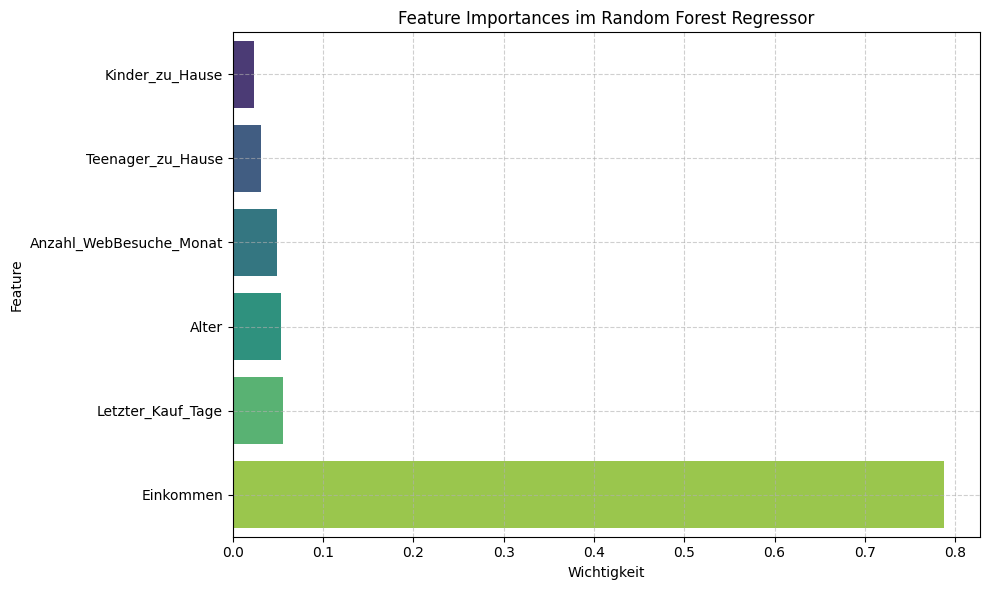

In [34]:
y_pred_reg = rf_reg.predict(X_test_reg)

# Modellbewertung
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Feature Importances visualisieren
importances = rf_reg.feature_importances_
feature_importances = pd.Series(importances, index=features).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title('Feature Importances im Random Forest Regressor')
plt.xlabel('Wichtigkeit')
plt.ylabel('Feature')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

K-Means Clustering

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)


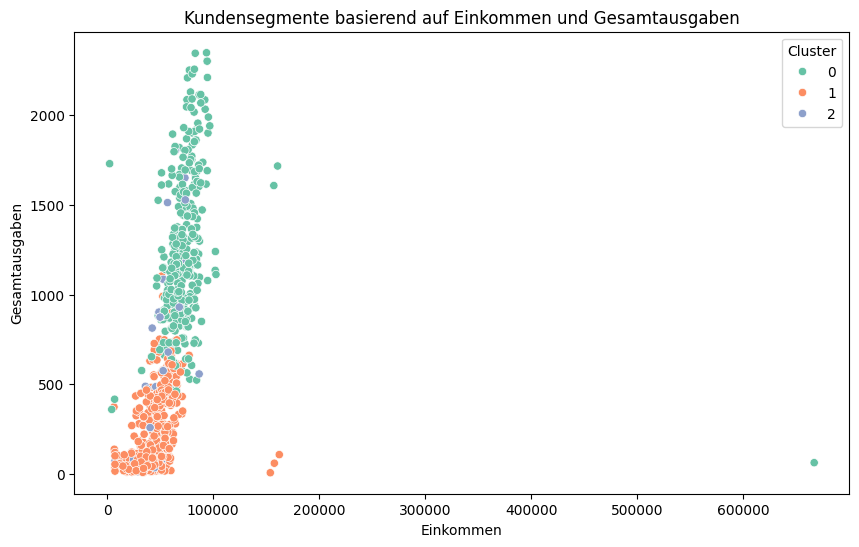

In [32]:
df.select_dtypes(include='number').groupby(df['Cluster']).mean().round(2)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Einkommen', y='Gesamtausgaben', hue='Cluster', palette='Set2')
plt.title("Kundensegmente basierend auf Einkommen und Gesamtausgaben")
plt.xlabel("Einkommen")
plt.ylabel("Gesamtausgaben")
plt.show()
